Trial03

In [2]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# LBP 알고리즘

def im2double(image):
	min_val = np.min(image.ravel()) # ravel() : 1차원 배열로 표현
	max_val = np.max(image.ravel())
	out = (image.astype('float') - min_val) / (max_val - min_val)
	return out


def s(x):
	temp = x>0
	return temp.astype(float)


def lbpCode(im_gray, threshold):
	width, height = im_gray.shape
	interpOff = math.sqrt(2)/2
	I = im2double(im_gray)
	pt = cv2.copyMakeBorder(I,1,1,1,1,cv2.BORDER_REPLICATE)
	right = pt[1:-1, 2:]
	left = pt[1:-1, :-2]
	above = pt[:-2, 1:-1]
	below = pt[2:, 1:-1];
	aboveRight = pt[:-2, 2:]
	aboveLeft = pt[:-2, :-2]
	belowRight = pt[2:, 2:]
	belowLeft = pt[2:, :-2]
	interp0 = right
	interp1 = (1-interpOff)*((1-interpOff) * I + interpOff * right) + interpOff *((1-interpOff) * above + interpOff * aboveRight)

	interp2 = above;
	interp3 = (1-interpOff)*((1-interpOff) * I + interpOff * left ) + interpOff *((1-interpOff) * above + interpOff * aboveLeft)

	interp4 = left;
	interp5 = (1-interpOff)*((1-interpOff) * I + interpOff * left ) + interpOff *((1-interpOff) * below + interpOff * belowLeft)

	interp6 = below;
	interp7 = (1-interpOff)*((1-interpOff) * I + interpOff * right ) + interpOff *((1-interpOff) * below + interpOff * belowRight) 

	s0 = s(interp0 - I-threshold)
	s1 = s(interp1 - I-threshold)
	s2 = s(interp2 - I-threshold)
	s3 = s(interp3 - I-threshold)
	s4 = s(interp4 - I-threshold)
	s5 = s(interp5 - I-threshold)
	s6 = s(interp6 - I-threshold)
	s7 = s(interp7 - I-threshold)
	LBP81 = s0 * 1 + s1 * 2+s2 * 4   + s3 * 8+ s4 * 16  + s5 * 32  + s6 * 64  + s7 * 128
	LBP81.astype(int)

	U = np.abs(s0 - s7) + np.abs(s1 - s0) + np.abs(s2 - s1) + np.abs(s3 - s2) + np.abs(s4 - s3) + np.abs(s5 - s4) + np.abs(s6 - s5) + np.abs(s7 - s6)
	LBP81riu2 = s0 + s1 + s2 + s3 + s4 + s5 + s6 + s7
	LBP81riu2[U > 2] = 9;

	return LBP81riu2



def lbpSharpness(im_gray, s, threshold):
	lbpmap  = lbpCode(im_gray, threshold)
	window_r = (s-1)//2;
	h, w = im_gray.shape[:2]
	map =  np.zeros((h, w), dtype=float)
	lbpmap_pad = cv2.copyMakeBorder(lbpmap, window_r, window_r, window_r, window_r, cv2.BORDER_REPLICATE)

	lbpmap_sum = (lbpmap_pad==6).astype(float) + (lbpmap_pad==7).astype(float) + (lbpmap_pad==8).astype(float) + (lbpmap_pad==9).astype(float)
	integral = cv2.integral(lbpmap_sum);
	integral = integral.astype(float)

	map = (integral[s-1:-1, s-1:-1]-integral[0:h, s-1:-1]-integral[s-1:-1, 0:w]+integral[0:h, 0:w])/math.pow(s,2);

	return map

### Gaussian Blur

count: 182009


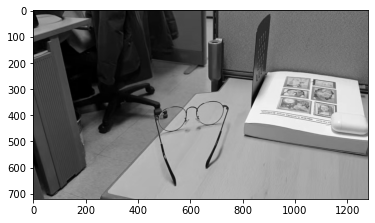

count: 188050


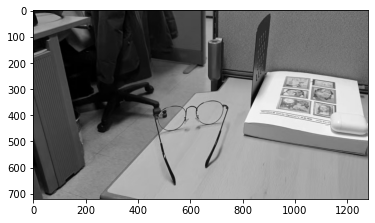

count: 174996


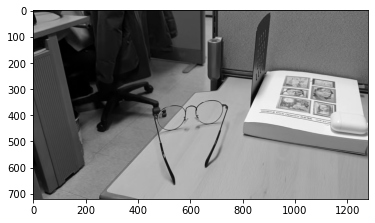

count: 180123


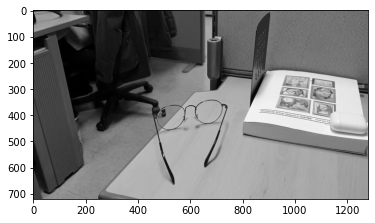

count: 176546


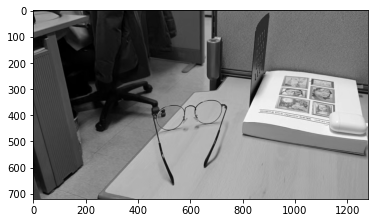

count: 173914


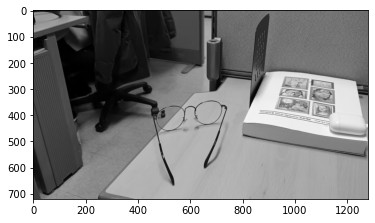

count: 178960


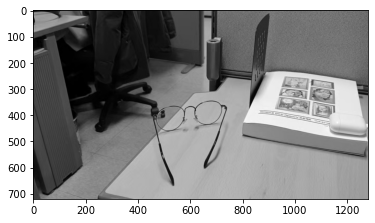

count: 182957


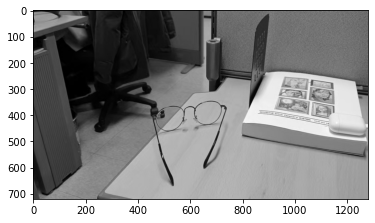

count: 176569


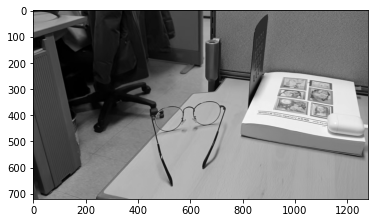

count: 155168


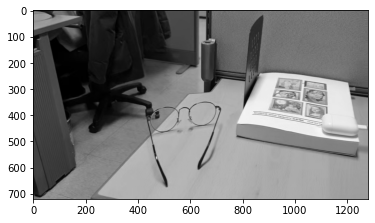

count: 51843


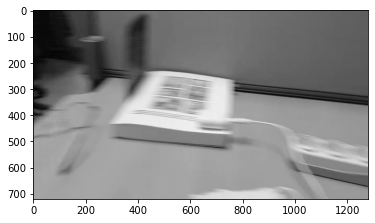

blurry
count: 19740


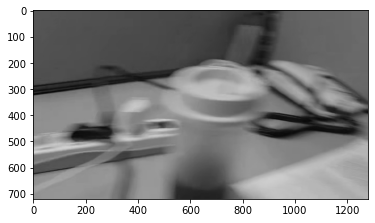

blurry
count: 55399


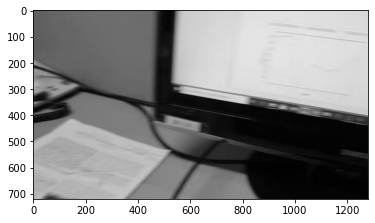

blurry
count: 142523


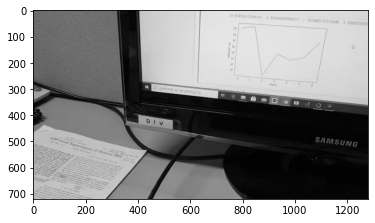

count: 142365


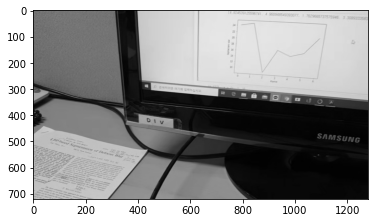

count: 219661


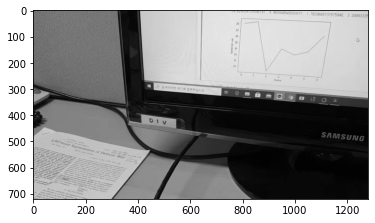

count: 156761


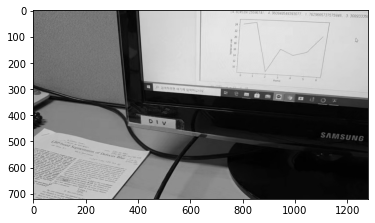

count: 162554


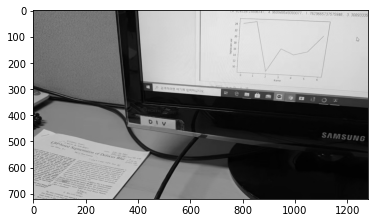

count: 165175


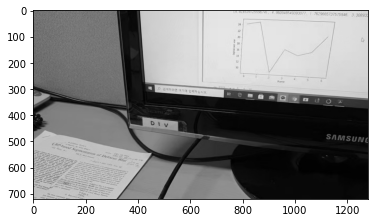

count: 169272


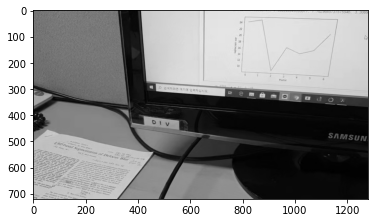

count: 174342


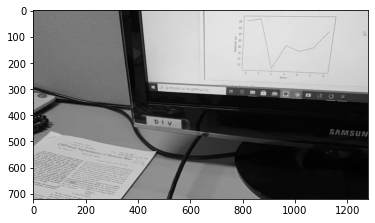

count: 224760


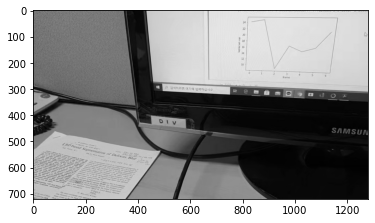

count: 175053


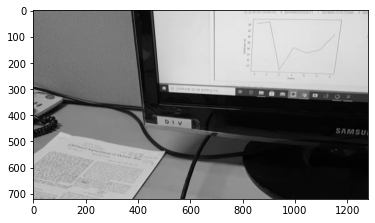

count: 74035


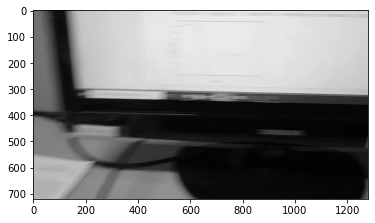

blurry
count: 13959


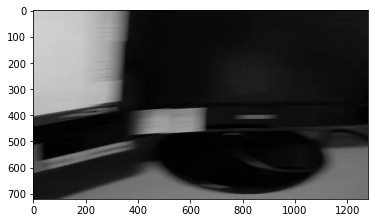

blurry
count: 5244


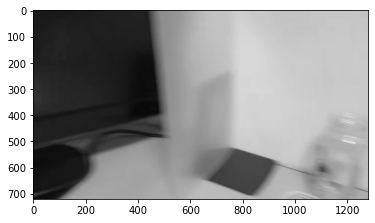

blurry
count: 37461


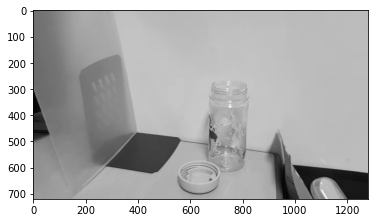

blurry
count: 43586


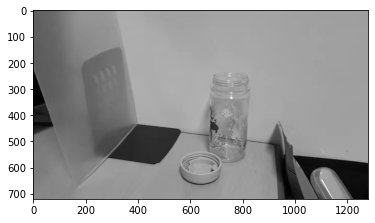

blurry
count: 47246


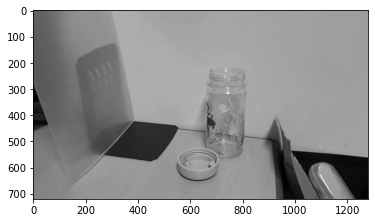

blurry
count: 49532


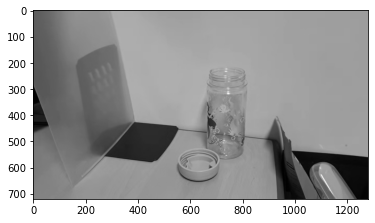

blurry
count: 49571


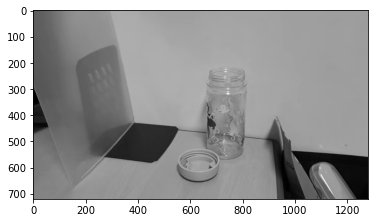

blurry
count: 54280


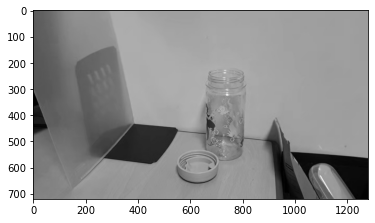

blurry
count: 55026


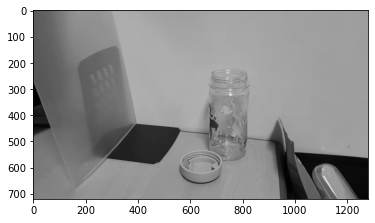

blurry
count: 55793


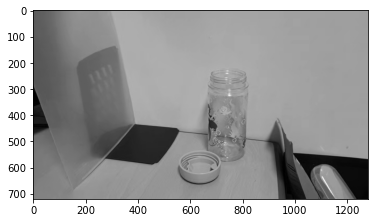

blurry
count: 56342


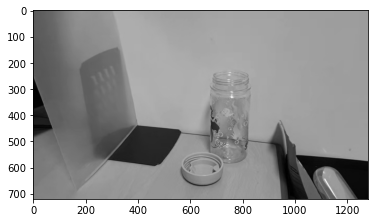

blurry
count: 479


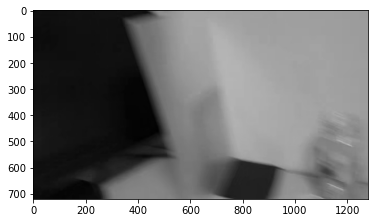

blurry
count: 5399


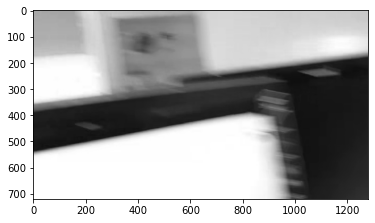

blurry
count: 53084


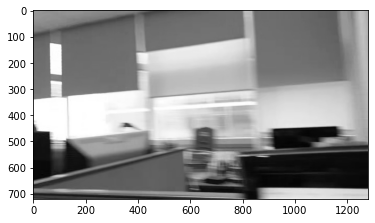

blurry
count: 110797


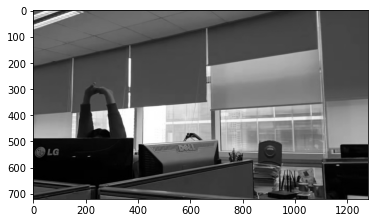

count: 135038


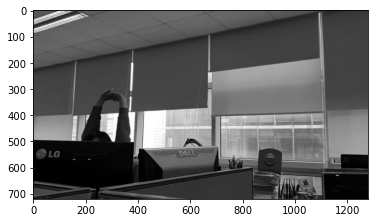

count: 133290


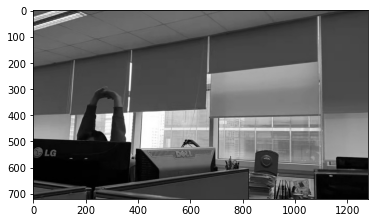

count: 132758


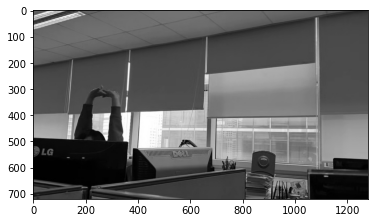

count: 137729


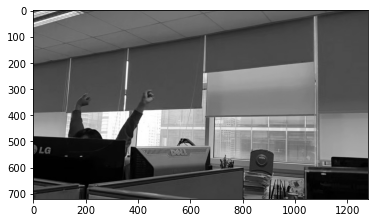

count: 141004


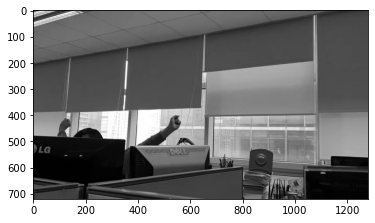

count: 135196


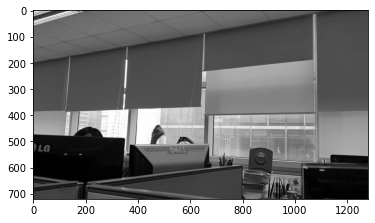

count: 143225


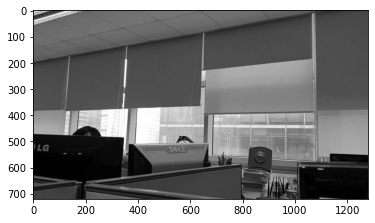

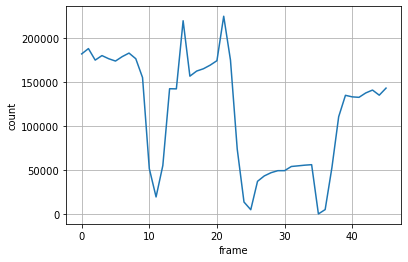

In [25]:
import glob
import itertools


# 폴더로부터 이미지 읽어오기

def getFilenames(exts):
       fnames = [glob.glob(ext) for ext in exts]
       fnames = list(itertools.chain.from_iterable(fnames))
       return fnames
    
# 이미지 경로 지정

exts = ["C:/Users/hannie/Desktop/images/*.jpg"]
res = getFilenames(exts)
res.sort()
count = []



# 각 이미지를 LBP 처리하는 과정을 반복하기

for img in res:
    
    # LBP 적용
    frame = cv2.imread(img)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    sharpness_map = lbpSharpness(frame_gray, 21, 0.016)
    sharpness_map = (sharpness_map - np.min(sharpness_map)) / (np.max(sharpness_map - np.min(sharpness_map)))
    sharpness_map = (sharpness_map * 255).astype("uint8")
    lbp = np.stack((sharpness_map,) , -1)
    
    blur = cv2.GaussianBlur(lbp, (3,3), 0)
    
    # 오츠 알고리즘
    ret, thresh_blur = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    v,h = blur.shape[0:2]
    c = 0

    for i in range(0,v):
        for j in range(0,h):
            if thresh_blur[i,j]==255:
                c += 1
    print('count: '+ str(c))
    plt.imshow(frame, 'gray')
    plt.show()

    if c < 100000: #임의로 설정한 값=20000
        print("blurry")
    
    count.append(c)

# plt 그래프로 출력하기
x = np.arange(0,len(res))
plt.plot(x,count)
plt.grid()
plt.xlabel('frame')
plt.ylabel('count')
plt.show()

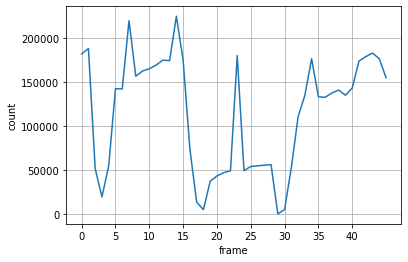

In [17]:
x = np.arange(0,len(res))
plt.plot(x,count)
plt.grid()
plt.xticks(np.arange(0,45,5))
plt.xlabel('frame')
plt.ylabel('count')
plt.show()

In [6]:
# 이미지 가져오기
img = cv2.imread('frame1.jpg',cv2.IMREAD_COLOR)
# img = cv2.imread('frame6.jpg',cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    
# threshold가 높을수록 초점이 뚜렷한 부분이 주목됨
sharpness_map = lbpSharpness(img_gray, 21, 0.032) # s=21, threshold=0.032
sharpness_map = (sharpness_map - np.min(sharpness_map)) / (np.max(sharpness_map - np.min(sharpness_map)))
sharpness_map = (sharpness_map * 255).astype("uint8") #uint8
lbp = np.stack((sharpness_map,) , -1)


# 가우시안 블러
blur = cv2.GaussianBlur(lbp, (3,3), 0)


# 이미지 출력
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
v,h = img.shape[0:2]

이 아래는 

In [ ]:
import glob
import itertools

def getFilenames(exts):
       fnames = [glob.glob(ext) for ext in exts]
       fnames = list(itertools.chain.from_iterable(fnames))
       return fnames
    
exts = ["C:/Users/hannie/Desktop/images/*.jpg"]
res = getFilenames(exts)
lbp_y=[]; org_y=[]

for img in res:
    
    frame = cv2.imread(img)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    sharpness_map = lbpSharpness(frame_gray, 21, 0.016)
    sharpness_map = (sharpness_map - np.min(sharpness_map)) / (np.max(sharpness_map - np.min(sharpness_map)))
    sharpness_map = (sharpness_map * 255).astype("uint8")
    lbp = np.stack((sharpness_map,) , -1)
#     cv2.imshow('frame',frame)
    
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    
    blur = cv2.GaussianBlur(lbp, (3,3), 0)
    laplacian_var = cv2.Laplacian(blur, cv2.CV_64F).var()
#     laplacian_var1 = cv2.Laplacian(frame, cv2.CV_64F).var()
    lbp_y.append(laplacian_var)
#     org_y.append(laplacian_var1)
    
    
print(lbp_y)
x = np.arange(0,len(lbp_y))
plt.plot(x,lbp_y)
# plt.plot(x,org_y)
plt.xlabel('frame')
plt.ylabel('laplacian var')
plt.show()

## 번외 -1

+ 모폴로지(형태학) : 침식 연산(MORPH_RECT)
: 큰 물체는 주변을 깎아서 작게 만들고 작은 객체(노이즈)는 사라지게 만듦.

하지만 육안으로 확인했을 때, 노이즈 제거 효과가 크지 않다.

In [141]:
# # 번외
# # 구조화 요소 커널
# k = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# # 침식 연산 적용
# erosion = cv2.erode(lbp,k)

# cv2.imshow('LBP',lbp)
# cv2.imshow('Erosion',erosion)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## 번외 -2

+ Adaptive threshold

물체의 외곽선을 잘 잡아내는 것은 좋은데, focused image와 blurred image가 결과적으로 크게 차이나지 않음.

In [164]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

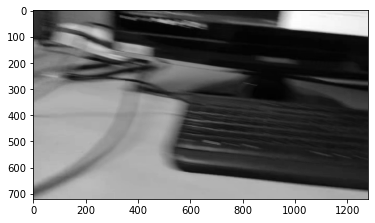

In [179]:
block = 9
C = 5
frame = cv2.imread('frame6.jpg', cv2.IMREAD_GRAYSCALE)

ret, th = cv2.threshold(frame, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C + cv2.THRESH_BINARY, block, C)
plt.imshow(frame, 'gray')
plt.show()

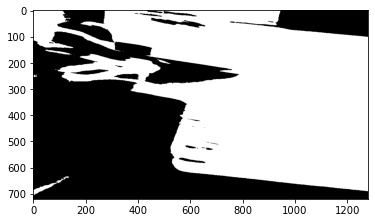

In [180]:
plt.imshow(th, 'gray')
plt.show()

## 번외 -3

+ 캐니 엣지 검출 (Canny)

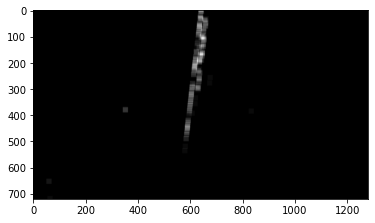

In [183]:
plt.imshow(np.stack((sharpness_map,)*3 , -1), 'gray') #LBP
plt.show()

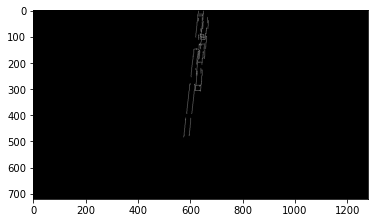

In [185]:
edges = cv2.Canny(blur,100,200)

plt.imshow(edges, 'gray')
plt.show()

## 참고 -4

+ 히스토그램(노멀라이즈, 이퀄라이즈 참조)

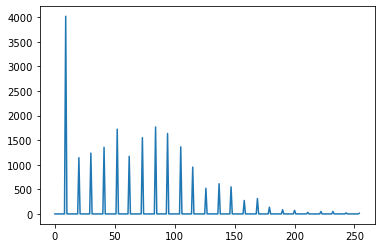

In [192]:
hist = cv2.calcHist([lbp], [0], None, [255], [1,256]) #0에서의 값이 너무 커서 1부터 시작.
plt.plot(hist)

20658.0 (720, 1280)


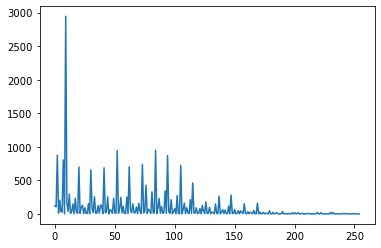

In [193]:
hist2 = cv2.calcHist([blur],[0],None,[255],[1,256])
plt.plot(hist2)

print(hist.sum(), img.shape)
plt.show()